<a href="https://colab.research.google.com/github/leonardonels/Colab-python/blob/main/5_DataVisualization_ExerciseText.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Traccia:

In [98]:
import pandas as pd
import numpy as np

1. Caricare il dataset "winemag-data_first150k.csv" all'interno di un DataFrame pandas


In [99]:
df=pd.read_csv("winemag-data_first150k.csv")
df

,id,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...,...
150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


2. Visualizzare tramite un bar plot le 10 province dalle quali si producono più vini (ovvero con un conteggio di vini maggiore). Cosa si evince dal grafico?

<Axes: xlabel='province'>

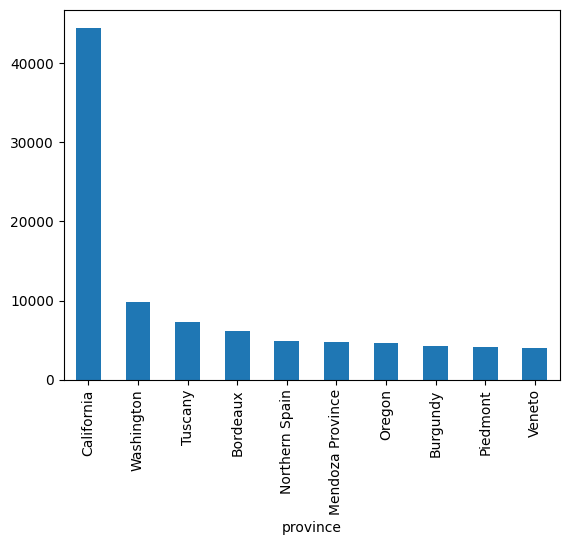

In [100]:
df["province"].value_counts().head(10).plot.bar()

3. Visualizzare tramite un bar plot le 10 province dalle quali si producono più vini. Visualizzare questa volta dati percentuali. Cosa si evince dal grafico?

<Axes: xlabel='province'>

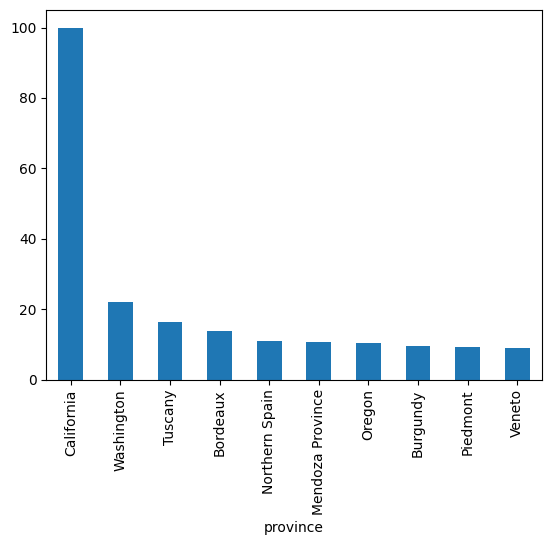

In [101]:
((df["province"].value_counts().head(10))/(df["province"].value_counts().iloc[0])*100).plot.bar()

<Axes: xlabel='province'>

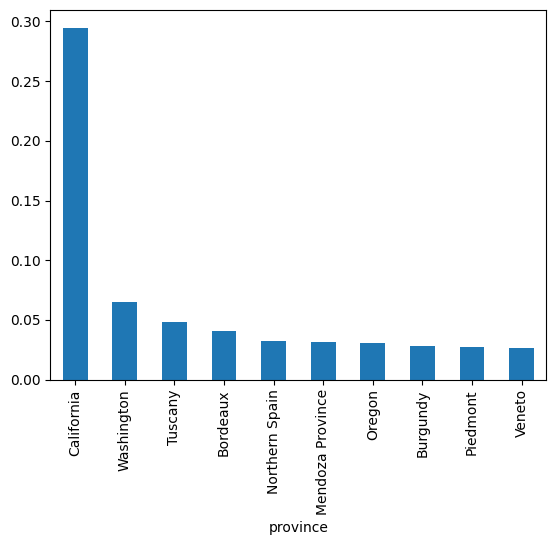

In [102]:
((df["province"].value_counts().head(10))/(len(df["province"]))).plot.bar()

4. Visualizzare tramite un bar plot il conteggio dei voti (colonna points) assegnati alle varie recensioni. Qual è il voto che è stato assegnato al maggior numero di recensioni?

<Axes: xlabel='points'>

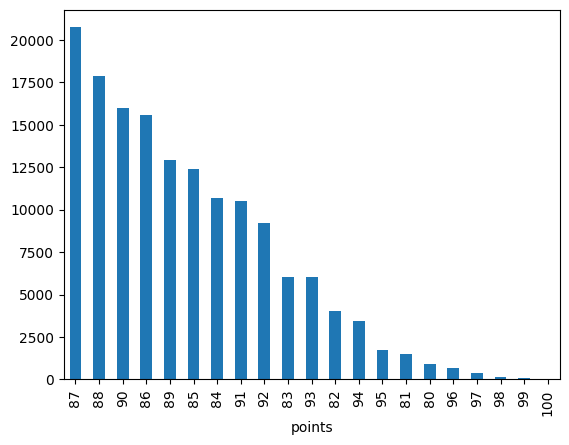

In [103]:
df['points'].value_counts().plot.bar()

5. Modificare il grafico precedente in modo da visualizzare i voti in senso crescente.

<Axes: xlabel='points'>

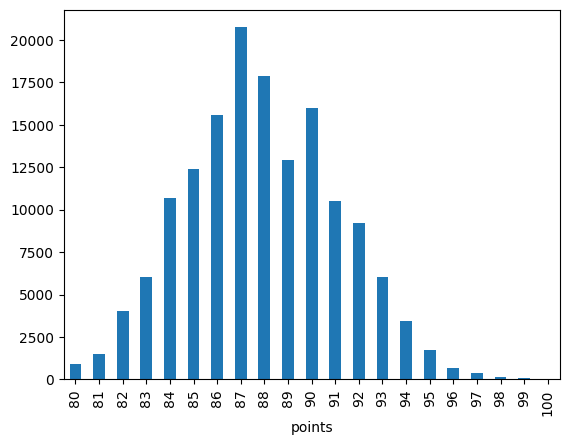

In [104]:
df['points'].value_counts().sort_index().plot.bar()

6. Visualizzare la stessa informazione del grafico del punto 5 con un grafico a linea

<Axes: xlabel='points'>

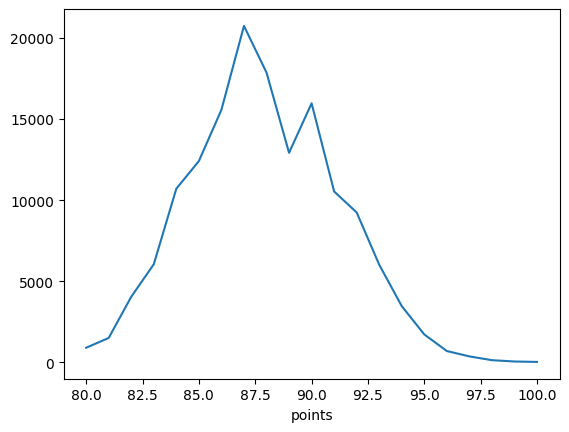

In [105]:
df['points'].value_counts().sort_index().plot.line()

7. Visualizzare con un istogramma la frequenza dei voti assegnati nelle varie recensioni.  Visualizzare il grafico anche con seaborn.

<Axes: ylabel='Frequency'>

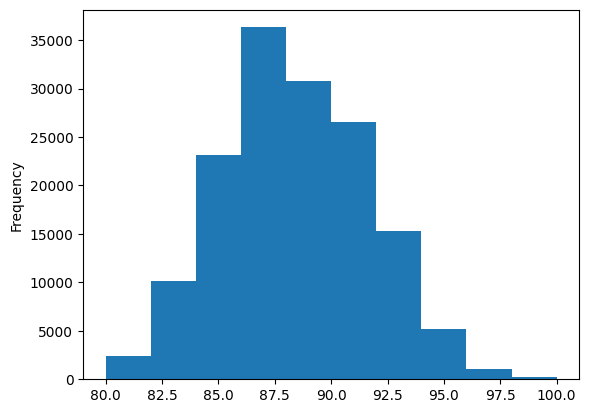

In [106]:
df['points'].plot.hist()

<Axes: xlabel='points', ylabel='Count'>

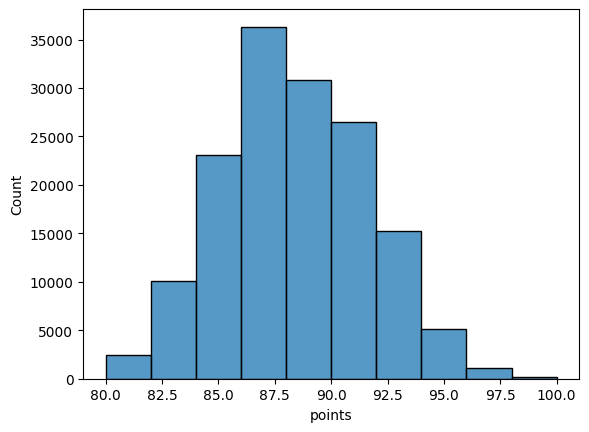

In [107]:
import seaborn as sns
sns.set_theme

sns.histplot(df['points'], bins=10, kde=False)

8. Visualizzare con un istogramma la frequenza del prezzo dei vini.

<Axes: ylabel='Frequency'>

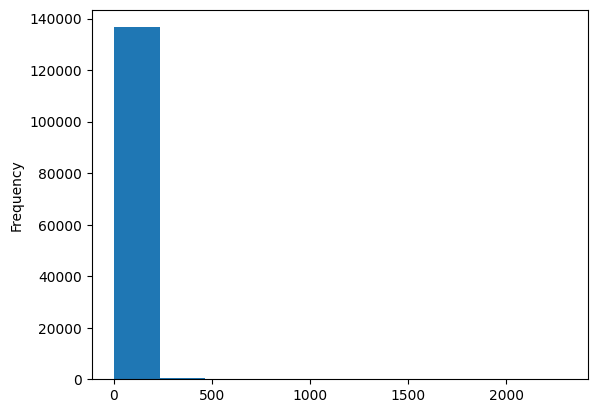

In [108]:
df['price'].plot.hist()

<Axes: xlabel='price', ylabel='Count'>

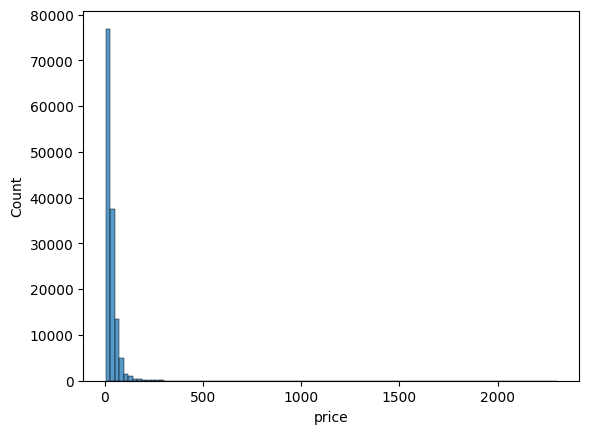

In [109]:
sns.histplot(df['price'], bins=100, kde=False)

9. Visualizzare con un istogramma la frequenza del prezzo dei vini che costano meno di 200 dollari.

<Axes: xlabel='price', ylabel='Count'>

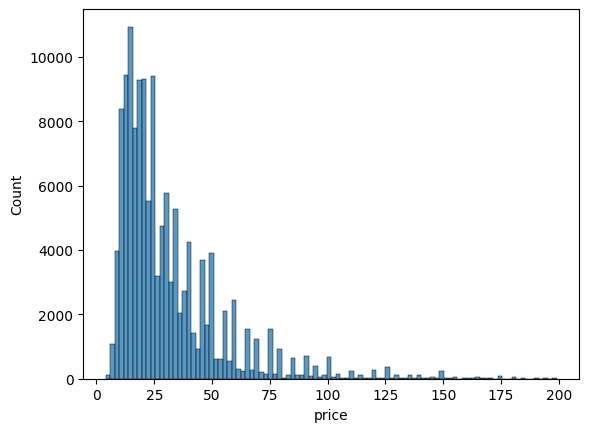

In [110]:
sns.histplot(data=df[df['price']<200]['price'], bins=100)

10. Visualizzare con uno scatter plot la relazione che sussiste tra voti assegnati nelle recensioni e prezzo del vino. Selezionare un sample di 100 elementi. Cosa è possibile notare? Visualizzare il grafico anche con seaborn.

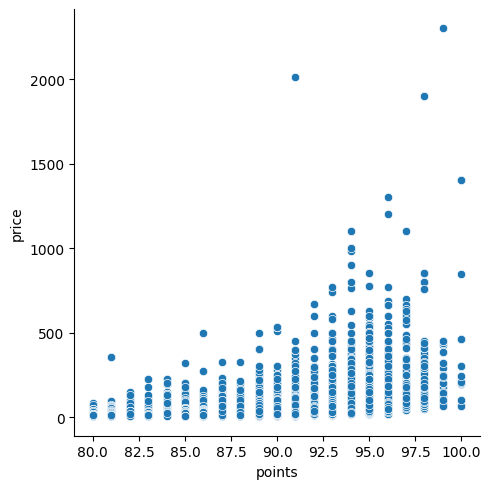

In [111]:
sns.relplot(
    data=df,
    x="points", y="price"
)

<Axes: xlabel='points', ylabel='price'>

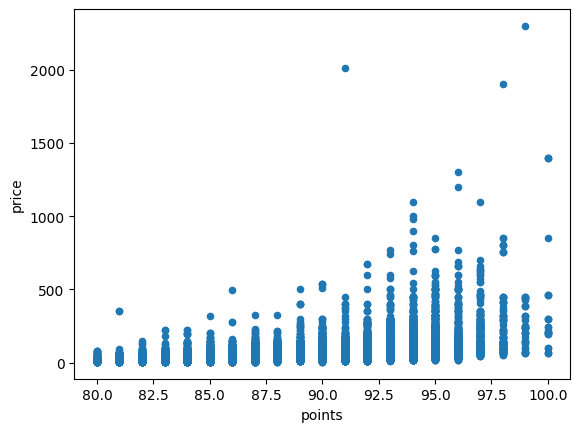

In [112]:
df.plot.scatter("points", "price")

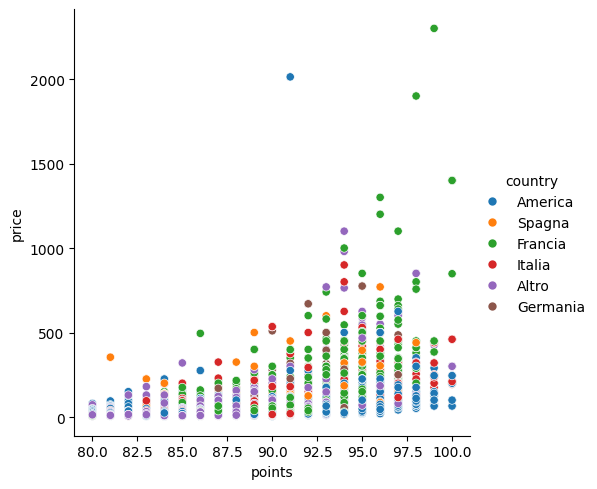

In [113]:
def get_country_name(country):
    countries = {
        "Italy": "Italia",
        "France": "Francia",
        "Germany": "Germania",
        "Spain": "Spagna",
        "US": "America"
    }
    return countries.get(country, "Altro")

cdf=pd.read_csv("winemag-data_first150k.csv")
cdf['country']=cdf['country'].apply(get_country_name)

sns.relplot(
    data=cdf,
    x="points", y="price", hue="country"
)

11. Selezionare le sole recensioni che si riferiscono alle seguenti varietà di vini: "Bordeaux-style Red Blend", "Cabernet Sauvignon", "Chardonnay", "Pinot Noir", "Red Blend". Raggruppare i vini per voto e varietà e conteggiarli (usare un group by). Visualizzare questa informazione con un bar plot stacked.

In [114]:
selected_varieties = ["Bordeaux-style Red Blend", "Cabernet Sauvignon", "Chardonnay", "Pinot Noir", "Red Blend"]
df_filtered = df[df['variety'].isin(selected_varieties)]
df_filtered

,id,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm
11,11,US,"From 18-year-old vines, this supple well-balan...",Estate Vineyard Wadensvil Block,95,48.0,Oregon,Ribbon Ridge,Willamette Valley,Pinot Noir,Patricia Green Cellars
...,...,...,...,...,...,...,...,...,...,...,...
150908,150908,France,"Another premier cru from Michel Gros, this one...",Aux Brulees,90,65.0,Burgundy,Vosne-Romanée,NaN,Pinot Noir,Michel Gros
150909,150909,France,"This is a lovely, fragrant Burgundy, with a sm...",Clos dea Argillieres,89,52.0,Burgundy,Nuits-St.-Georges,NaN,Pinot Noir,Daniel Rion
150910,150910,France,Scents of graham cracker and malted milk choco...,NaN,89,38.0,Burgundy,Chambolle-Musigny,NaN,Pinot Noir,Michel Gros
150911,150911,France,"This needs a good bit of breathing time, then ...",Les Chaliots,87,37.0,Burgundy,Nuits-St.-Georges,NaN,Pinot Noir,Michel Gros


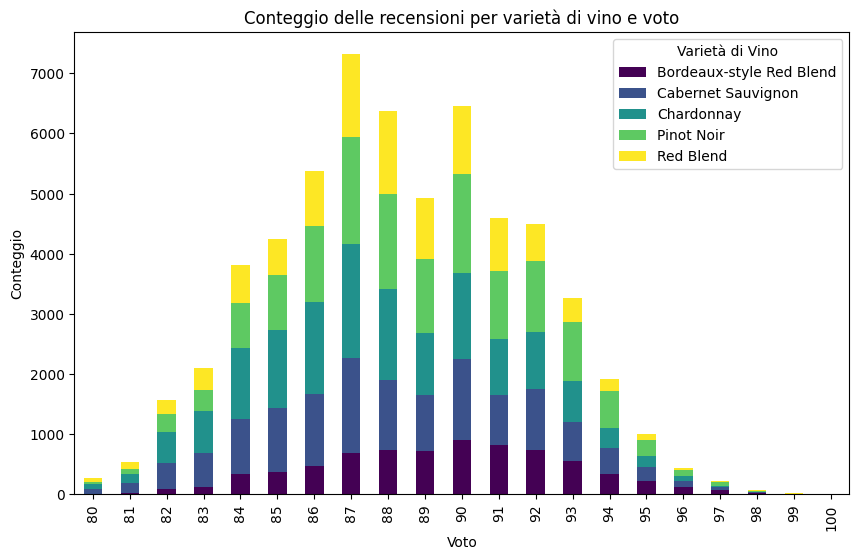

In [115]:
import matplotlib.pyplot as plt

df_grouped = df_filtered.groupby(['points', 'variety']).size().unstack(fill_value=0)

df_grouped.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="viridis")
plt.title("Conteggio delle recensioni per varietà di vino e voto")
plt.xlabel("Voto")
plt.ylabel("Conteggio")
plt.legend(title="Varietà di Vino")
plt.show()

12. Visualizzare l'informazione precedente con un plot area ed un line chart.

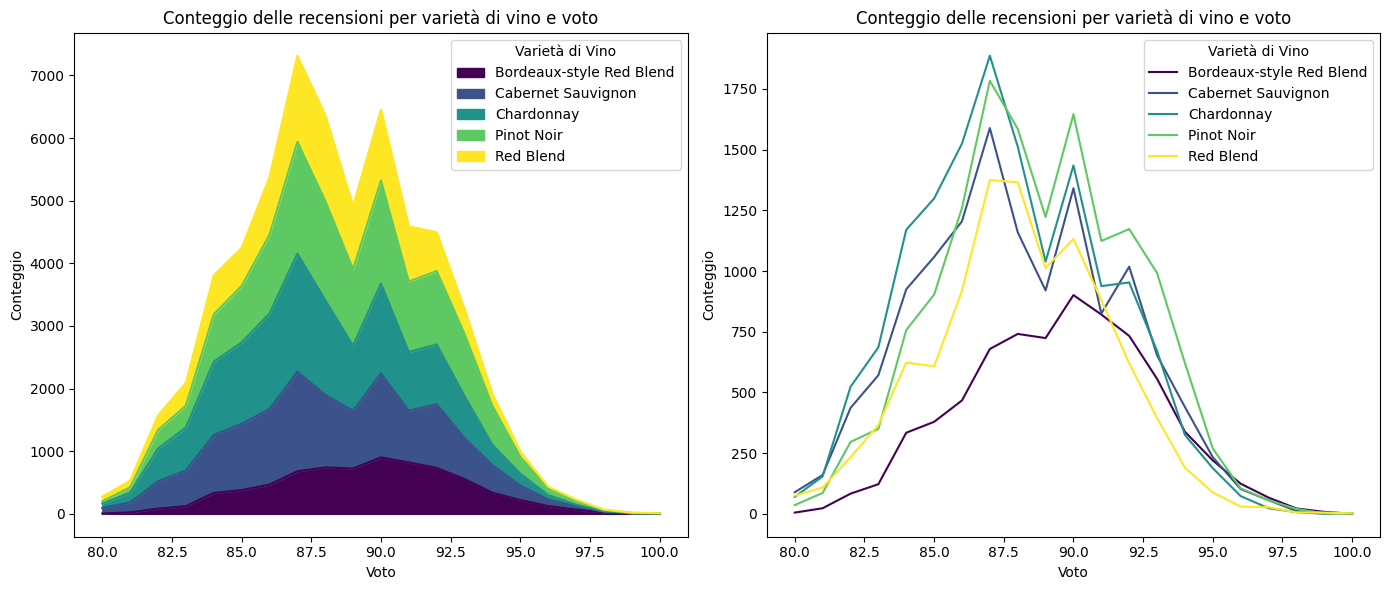

In [116]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

df_grouped.plot(kind='area', stacked=True,colormap='viridis', ax=ax1)
ax1.set_title("Conteggio delle recensioni per varietà di vino e voto")
ax1.set_xlabel("Voto")
ax1.set_ylabel("Conteggio")
ax1.legend(title="Varietà di Vino")

df_grouped.plot(kind='line', stacked=False,colormap='viridis', ax=ax2)
ax2.set_title("Conteggio delle recensioni per varietà di vino e voto")
ax2.set_xlabel("Voto")
ax2.set_ylabel("Conteggio")
ax2.legend(title="Varietà di Vino")

plt.tight_layout()
plt.show()

13. Visualizzare con un box plot (con seaborn) la distribuzione dei voti per le 5 varietà di vini "Bordeaux-style Red Blend", "Cabernet Sauvignon", "Chardonnay", "Pinot Noir", "Red Blend".

In [117]:
selected_varieties = ["Bordeaux-style Red Blend", "Cabernet Sauvignon", "Chardonnay", "Pinot Noir", "Red Blend"]
df_filtered = df[df['variety'].isin(selected_varieties)]
df_filtered

,id,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm
11,11,US,"From 18-year-old vines, this supple well-balan...",Estate Vineyard Wadensvil Block,95,48.0,Oregon,Ribbon Ridge,Willamette Valley,Pinot Noir,Patricia Green Cellars
...,...,...,...,...,...,...,...,...,...,...,...
150908,150908,France,"Another premier cru from Michel Gros, this one...",Aux Brulees,90,65.0,Burgundy,Vosne-Romanée,NaN,Pinot Noir,Michel Gros
150909,150909,France,"This is a lovely, fragrant Burgundy, with a sm...",Clos dea Argillieres,89,52.0,Burgundy,Nuits-St.-Georges,NaN,Pinot Noir,Daniel Rion
150910,150910,France,Scents of graham cracker and malted milk choco...,NaN,89,38.0,Burgundy,Chambolle-Musigny,NaN,Pinot Noir,Michel Gros
150911,150911,France,"This needs a good bit of breathing time, then ...",Les Chaliots,87,37.0,Burgundy,Nuits-St.-Georges,NaN,Pinot Noir,Michel Gros


In [118]:
df_grouped = df_filtered.groupby(['points', 'variety']).size().unstack(fill_value=0)
df_grouped

variety,Bordeaux-style Red Blend,Cabernet Sauvignon,Chardonnay,Pinot Noir,Red Blend
points,,,,,
80,5,89,70,36,75
81,23,160,154,86,108
82,83,436,523,296,233
83,122,571,686,350,366
84,334,925,1170,757,623
85,379,1058,1299,903,608
86,467,1205,1525,1260,919
87,679,1589,1887,1784,1375
88,741,1160,1513,1586,1366


<Axes: ylabel='variety'>

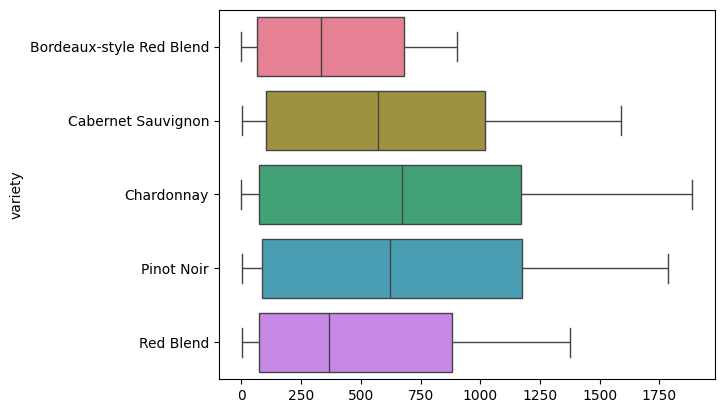

In [119]:
sns.boxplot(df_grouped, palette=sns.color_palette("husl", 5), orient='h')

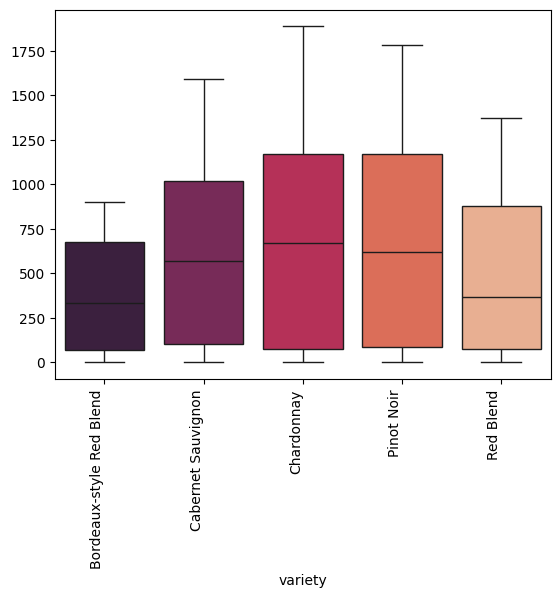

In [120]:
sns.boxplot(df_grouped, palette=sns.color_palette("rocket", 5))

plt.xticks(rotation=90, ha='right')
plt.show()

<Axes: xlabel='variety'>

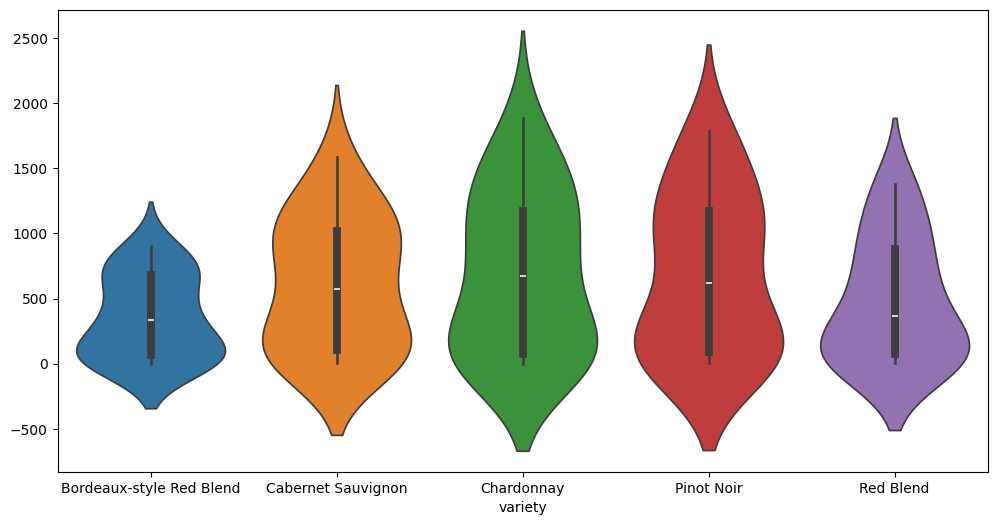

In [121]:
plt.figure(figsize=(12, 6))
sns.violinplot(df_grouped)

14. Visualizzare con seaborn un istogramma relativo alla frequenza di voti per ognuna delle 5 varietà di vini precedenti. Utilizzare FacetGrid.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packa

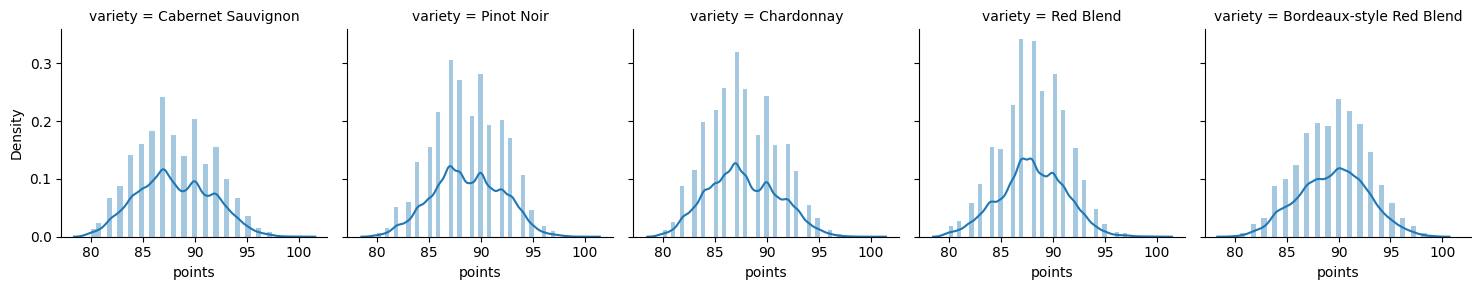

In [126]:
g = sns.FacetGrid(df_filtered, col="variety")
g.map(sns.distplot, "points")

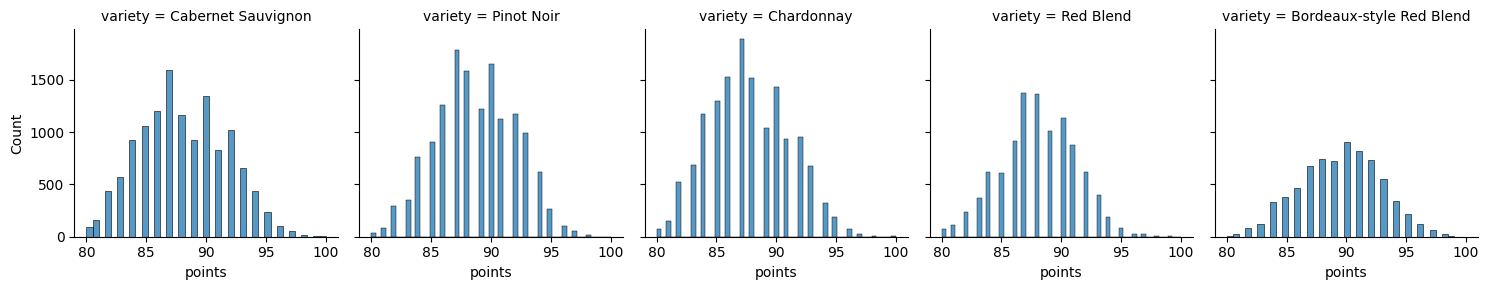

In [131]:
g = sns.FacetGrid(df_filtered, col="variety")
g.map(sns.histplot, "points")

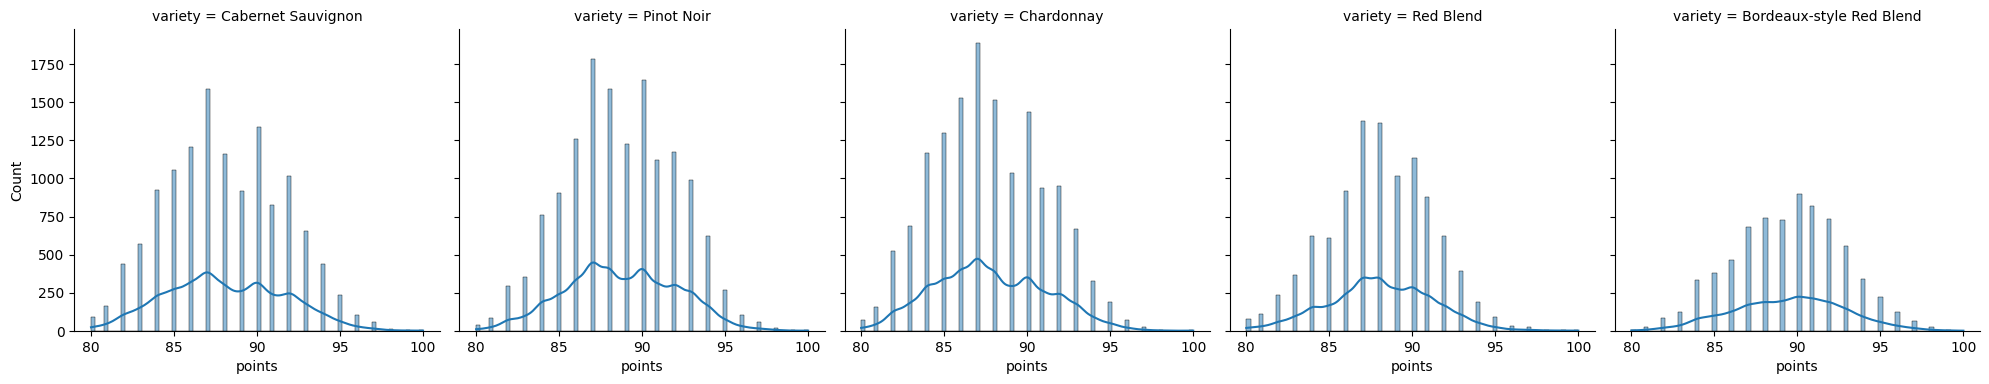

In [132]:
g = sns.displot(
    data=df_filtered,
    x="points",
    col="variety",
    kind="hist",
    kde=True,
    height=4,
    aspect=1
)

plt.subplots_adjust(top=0.9)
plt.show()

15. Visualizzare con pairplot seaborn una comparison tra il prezzo dei vini e i voti associati. Selezionare un sample di 100 elementi e rimuovere prima i valori nulli.

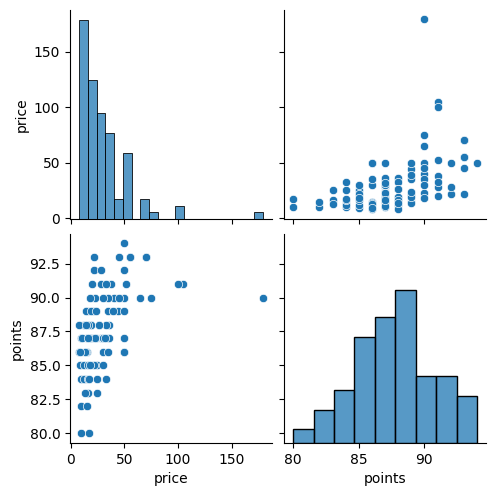

In [134]:
df_cleaned = df.dropna(subset=['price', 'points'])
df_sample = df_cleaned.sample(n=100, random_state=42)

sns.pairplot(df_sample, vars=['price', 'points'], kind='scatter')

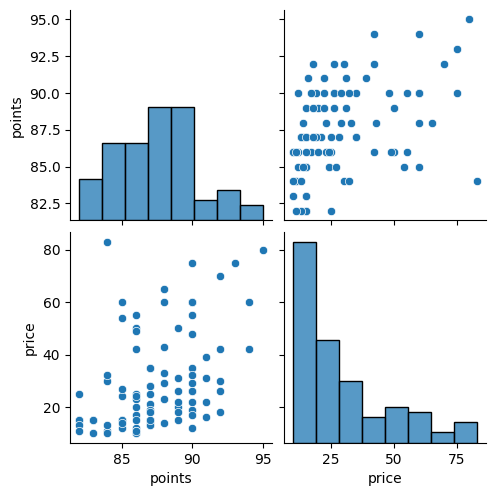

In [138]:
sns.pairplot(df[["points", "price"]].sample(100).dropna())

16. Visualizzare in un heatmap seaborn la correlazione tra il prezzo dei vini e i voti associati.

<Axes: >

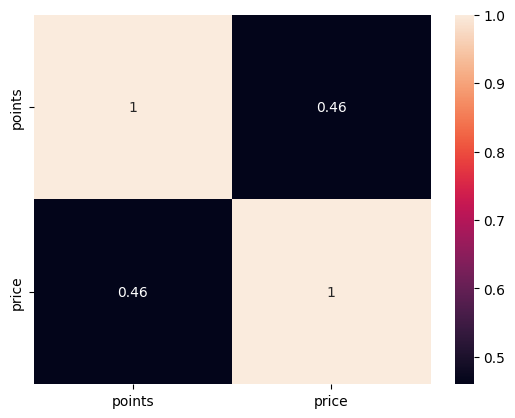

In [145]:
sns.heatmap(df[["points", "price"]].corr(), annot=True)

<Axes: >

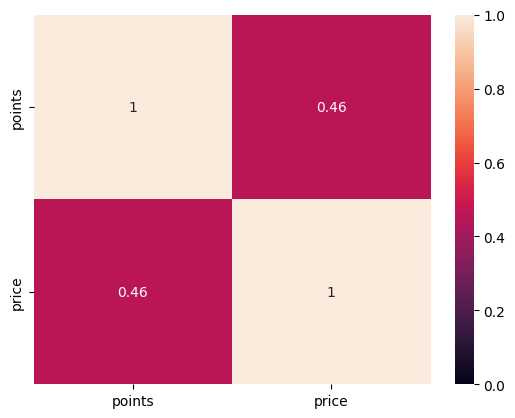

In [147]:
sns.heatmap(df[["points", "price"]].corr(), annot=True, vmin=0, vmax=1)